In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [2]:
data = pd.read_csv('dataset/stock_data.csv')

In [3]:
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close,Company Name
0,2010-01-04,6215.000000,6032.000000,6081.000000,6142.950195,18735.0,5979.571777,MRF
1,2010-01-05,6269.000000,6150.000000,6200.000000,6160.600098,17947.0,5996.752441,MRF
2,2010-01-06,6198.000000,6055.000000,6180.000000,6090.399902,10735.0,5928.420898,MRF
3,2010-01-07,6371.000000,6151.000000,6249.899902,6216.200195,42206.0,6050.873535,MRF
4,2010-01-08,6294.399902,6150.000000,6243.299805,6166.850098,11155.0,6002.837891,MRF
5,2010-01-11,6252.000000,6150.000000,6199.000000,6158.600098,9387.0,5994.806152,MRF
6,2010-01-12,6194.399902,6060.000000,6194.399902,6084.350098,7286.0,5922.532715,MRF
7,2010-01-13,6145.000000,6048.000000,6085.000000,6107.100098,7550.0,5944.675293,MRF
8,2010-01-14,6485.000000,6131.149902,6167.799805,6440.799805,59564.0,6269.500000,MRF
9,2010-01-15,6549.500000,6380.000000,6498.700195,6406.100098,28721.0,6235.722168,MRF


In [4]:
data.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'Company Name'],
      dtype='object')

In [5]:
data.drop('Adj Close',axis=1,inplace=True)
data.drop('Date',axis=1,inplace=True)
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Company Name'], dtype='object')

In [6]:
encoder = LabelEncoder()
data['Company Name'] = encoder.fit_transform(data['Company Name'])

In [7]:
data

,High,Low,Open,Close,Volume,Company Name
0,6215.000000,6032.000000,6081.000000,6142.950195,18735.0,2
1,6269.000000,6150.000000,6200.000000,6160.600098,17947.0,2
2,6198.000000,6055.000000,6180.000000,6090.399902,10735.0,2
3,6371.000000,6151.000000,6249.899902,6216.200195,42206.0,2
4,6294.399902,6150.000000,6243.299805,6166.850098,11155.0,2
...,...,...,...,...,...,...
12310,1538.367798,1495.969727,1527.173950,1501.170410,13734705.0,3
12311,1531.681152,1507.015015,1512.661499,1527.867310,8158196.0,3
12312,1533.117554,1513.701660,1531.433594,1529.699951,7902607.0,3
12313,1529.204712,1493.889404,1527.520630,1499.833130,10246683.0,3


In [8]:
data['Company Name'].value_counts()

2    2463
1    2463
4    2463
0    2463
3    2463
Name: Company Name, dtype: int64

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
data['High'] = scaler.fit_transform(np.array(data['High']).reshape(-1,1))
data['Close'] = scaler.fit_transform(np.array(data['Close']).reshape(-1,1))
data['Open'] = scaler.fit_transform(np.array(data['Open']).reshape(-1,1))
data['Low'] = scaler.fit_transform(np.array(data['Low']).reshape(-1,1))
data['Volume'] = scaler.fit_transform(np.array(data['Volume']).reshape(-1,1))


In [10]:
data

,High,Low,Open,Close,Volume,Company Name
0,0.075059,0.074434,0.073824,0.074738,0.000085,2
1,0.075723,0.075916,0.075295,0.074957,0.000081,2
2,0.074850,0.074723,0.075048,0.074087,0.000048,2
3,0.076977,0.075929,0.075912,0.075645,0.000191,2
4,0.076035,0.075916,0.075830,0.075034,0.000050,2
...,...,...,...,...,...,...
12310,0.017546,0.017459,0.017526,0.017257,0.062044,3
12311,0.017463,0.017598,0.017347,0.017587,0.036853,3
12312,0.017481,0.017682,0.017579,0.017610,0.035698,3
12313,0.017433,0.017433,0.017531,0.017240,0.046287,3


In [11]:
X = data.drop('Close', axis=1)
y = data.Close

In [12]:
print(X.shape)
print(y.shape)

(12315, 5)
(12315,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9236, 5)
(9236,)
(3079, 5)
(3079,)


In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.score(X_train, y_train)

0.9999649456530404

In [18]:
y_pred = model.predict(X_test)

In [19]:
model.score(X_test, y_test)

0.9999521670345198

In [20]:
model.coef_

array([ 8.85343510e-01,  7.58426840e-01, -6.51435171e-01,  6.72751086e-04,
       -1.21125490e-06])

In [21]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: %2f'% mean_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 0.00
Mean Absolute Error: 0.000383
Coefficient of determination: 1.00


Text(0, 0.5, 'Y Predict')

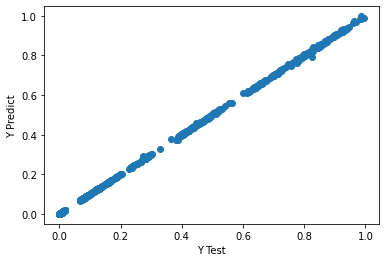

In [22]:
plt.scatter(x = y_test, y = y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predict')

In [23]:
model2 = RandomForestRegressor()

In [24]:
model2.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
model.score(X_train, y_train)

0.9999649456530404

In [26]:
y_pred = model2.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.9999521670345198

In [28]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: %2f'% mean_absolute_error(y_test, y_pred))
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 0.00
Mean Absolute Error: 0.000550
Coefficient of determination: 1.00


Text(0, 0.5, 'Y Predict')

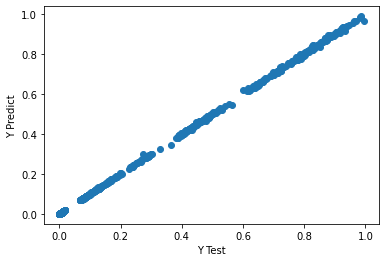

In [29]:
plt.scatter(x = y_test, y = y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predict')

In [30]:
with open('model/model.pickle', 'wb') as file:
      pickle.dump(model, file)